# Getting started with Neural Networks

###  The IMDB dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.



In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


### Preparing the data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Now the data is ready to be fed into a neural network.



### Building your network

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validating your approach

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.



In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 804us/step - loss: 0.5088 - acc: 0.7881 - val_loss: 0.3937 - val_acc: 0.8660
Epoch 2/20
15000/15000 [==============================] - 6s 414us/step - loss: 0.3165 - acc: 0.9026 - val_loss: 0.3140 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 7s 437us/step - loss: 0.2355 - acc: 0.9271 - val_loss: 0.3030 - val_acc: 0.8791
Epoch 4/20
15000/15000 [==============================] - 7s 467us/step - loss: 0.1901 - acc: 0.9404 - val_loss: 0.2776 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 8s 529us/step - loss: 0.1570 - acc: 0.9525 - val_loss: 0.2768 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 7s 445us/step - loss: 0.1314 - acc: 0.9601 - val_loss: 0.3020 - val_acc: 0.8802
Epoch 7/20
15000/15000 [==============================] - 6s 426us/step - loss: 0.1104 - acc: 0.9677 - val_loss: 0.2929 -

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

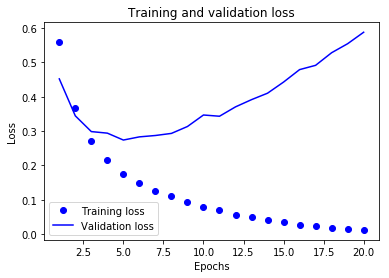

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


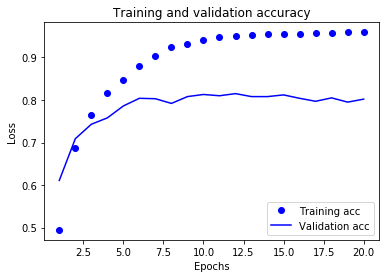

In [55]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 13s 528us/step - loss: 0.4747 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 9s 359us/step - loss: 0.2644 - acc: 0.9098 1s - loss: 0.2673 - acc: 
Epoch 3/4
25000/25000 [==============================] - 8s 335us/step - loss: 0.1985 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 25s 1ms/step


In [33]:
results

[0.3236575030708313, 0.873]

### Home Tasks

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

* You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the ```mse``` loss function instead of ```binary_crossentropy```.
* Try using the ```tanh``` activation (an activation that was popular in the early days of neural networks) instead of relu.

**Один слой**

In [27]:
#one
model_one = models.Sequential()
model_one.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_one.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model_one.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

one_history = model_one.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 631us/step - loss: 0.5098 - acc: 0.8119 - val_loss: 0.4067 - val_acc: 0.8664
Epoch 2/20
15000/15000 [==============================] - 6s 395us/step - loss: 0.3361 - acc: 0.8961 - val_loss: 0.3446 - val_acc: 0.8692
Epoch 3/20
15000/15000 [==============================] - 6s 375us/step - loss: 0.2636 - acc: 0.9198 - val_loss: 0.2987 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 6s 393us/step - loss: 0.2162 - acc: 0.9345 - val_loss: 0.2820 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 6s 393us/step - loss: 0.1842 - acc: 0.9445 - val_loss: 0.2793 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 6s 398us/step - loss: 0.1583 - acc: 0.9535 - val_loss: 0.2739 - val_acc: 0.8899
Epoch 7/20
15000/15000 [==============================] - 6s 385us/step - loss: 0.1379 - acc: 0.9603 - val_loss: 0.2851 - 

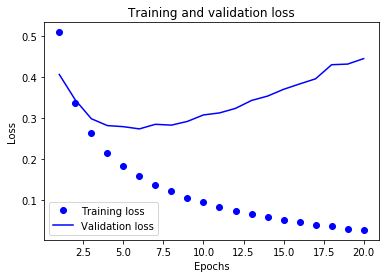

In [30]:
one_history_dict = one_history.history
loss_values1 = one_history_dict['loss']
val_loss_values1 = one_history_dict['val_loss']

epochs1 = range(1, len(one_history_dict['acc']) + 1)

plt.plot(epochs1, loss_values1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss_values1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

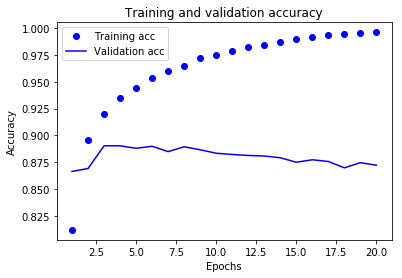

In [33]:
plt.clf()
acc_values1 = one_history_dict['acc']
val_acc_values1 = one_history_dict['val_acc']

plt.plot(epochs1, acc_values1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc_values1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


** для одного слоя наивысшая Accuracy будет при 3 эпохах **

In [34]:
model_one.fit(x_train, y_train, epochs=3, batch_size=512)
results = model_one.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 6s 258us/step - loss: 0.1844 - acc: 0.9478
Epoch 2/3
25000/25000 [==============================] - 7s 295us/step - loss: 0.1418 - acc: 0.9573
Epoch 3/3
25000/25000 [==============================] - 19s 762us/step


[0.4067939993858337, 0.86372]

Точность ниже чем на 2 слоях

** Три слоя **

In [35]:
#three
model_three = models.Sequential()
model_three.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_three.add(layers.Dense(16, activation='relu'))
model_three.add(layers.Dense(16, activation='relu'))
model_three.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model_three.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

three_history = model_three.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 738us/step - loss: 0.5934 - acc: 0.6662 - val_loss: 0.5148 - val_acc: 0.7661
Epoch 2/20
15000/15000 [==============================] - 7s 469us/step - loss: 0.4114 - acc: 0.8811 - val_loss: 0.3827 - val_acc: 0.8577
Epoch 3/20
15000/15000 [==============================] - 7s 496us/step - loss: 0.2662 - acc: 0.9210 - val_loss: 0.2929 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 6s 424us/step - loss: 0.1903 - acc: 0.9408 - val_loss: 0.2954 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.1515 - acc: 0.9523 - val_loss: 0.3083 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 8s 515us/step - loss: 0.1199 - acc: 0.9627 - val_loss: 0.3026 - val_acc: 0.8840
Epoch 7/20
15000/15000 [==============================] - 7s 445us/step - loss: 0.0984 - acc: 0.9719 - val_loss: 0.3330 -

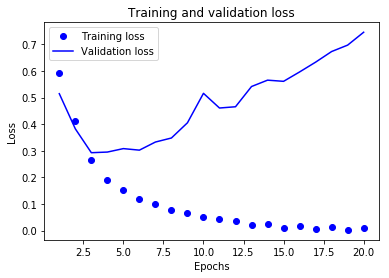

In [37]:
three_history_dict = three_history.history
loss_values3 = three_history_dict['loss']
val_loss_values3 = three_history_dict['val_loss']

epochs3 = range(1, len(three_history_dict['acc']) + 1)

plt.plot(epochs3, loss_values3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_values3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

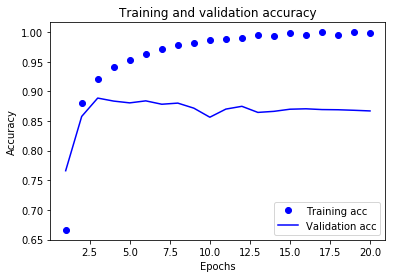

In [38]:
plt.clf()
acc_values3 = three_history_dict['acc']
val_acc_values3 = three_history_dict['val_acc']

plt.plot(epochs3, acc_values3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_values3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

для трех слоев наивысшая Accuracy также будет при 3 эпохах

In [39]:
model_three.fit(x_train, y_train, epochs=3, batch_size=512)
results = model_three.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 7s 264us/step - loss: 0.2365 - acc: 0.9420
Epoch 2/3
25000/25000 [==============================] - 6s 251us/step - loss: 0.1420 - acc: 0.9581
Epoch 3/3
25000/25000 [==============================] - 19s 741us/step


[0.5119369444561005, 0.85788]

Точность ниже чем на 1 и 2 слоях

** Таким образом, при модель из двух hidden layers показывает бОльшую точность, чем при 1 или 3  
максимальная точность: 0.87**

*** Изменение количества узлов:   
(количество слоев оставим 2 как самое удачное)***

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 565us/step - loss: 0.5598 - acc: 0.7943 - val_loss: 0.4519 - val_acc: 0.8534
Epoch 2/20
15000/15000 [==============================] - 6s 368us/step - loss: 0.3679 - acc: 0.8920 - val_loss: 0.3443 - val_acc: 0.8825
Epoch 3/20
15000/15000 [==============================] - 6s 375us/step - loss: 0.2725 - acc: 0.9169 - val_loss: 0.2985 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.2146 - acc: 0.9328 - val_loss: 0.2940 - val_acc: 0.8808
Epoch 5/20
15000/15000 [==============================] - 6s 394us/step - loss: 0.1764 - acc: 0.9441 - val_loss: 0.2739 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 6s 384us/step - loss: 0.1488 - acc: 0.9533 - val_loss: 0.2832 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 7s 436us/step - loss: 0.1263 - acc: 0.9619 - val_loss: 0.2872 - 

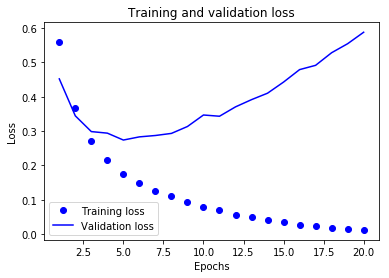

In [21]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

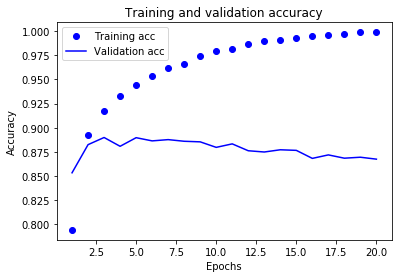

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 6s 259us/step - loss: 0.1000 - acc: 0.9694
Epoch 2/3
25000/25000 [==============================] - 6s 245us/step - loss: 0.0849 - acc: 0.9745
Epoch 3/3
25000/25000 [==============================] - 21s 854us/step


[0.5338536053562164, 0.85588]

** При 2 слоях и количестве нейронов 16 и 8 на 1 и 2 слоях соответственно точность модели понизилась и составила 0.856**

In [35]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 686us/step - loss: 0.4951 - acc: 0.7753 - val_loss: 0.3435 - val_acc: 0.8804
Epoch 2/20
15000/15000 [==============================] - 6s 432us/step - loss: 0.2774 - acc: 0.9029 - val_loss: 0.2883 - val_acc: 0.8914
Epoch 3/20
15000/15000 [==============================] - 7s 438us/step - loss: 0.1954 - acc: 0.9313 - val_loss: 0.2723 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 7s 452us/step - loss: 0.1548 - acc: 0.9478 - val_loss: 0.2809 - val_acc: 0.8889
Epoch 5/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.1225 - acc: 0.9578 - val_loss: 0.3746 - val_acc: 0.8679
Epoch 6/20
15000/15000 [==============================] - 7s 436us/step - loss: 0.0951 - acc: 0.9709 - val_loss: 0.3267 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 7s 438us/step - loss: 0.0788 - acc: 0.9753 - val_loss: 0.3515 -

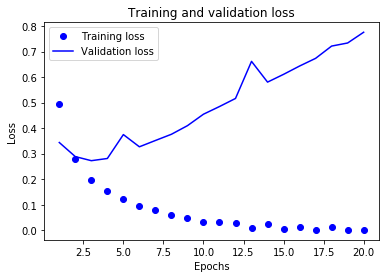

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

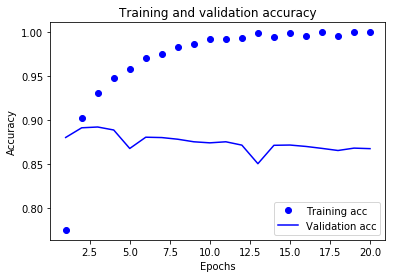

In [37]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 7s 297us/step - loss: 0.2308 - acc: 0.9465
Epoch 2/3
25000/25000 [==============================] - 7s 278us/step - loss: 0.1216 - acc: 0.9649
Epoch 3/3
25000/25000 [==============================] - 20s 817us/step


[0.46586409010410307, 0.86148]

Точность оставляет желать лучшего  
Попробуем упростить

In [29]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 644us/step - loss: 0.5376 - acc: 0.7903 - val_loss: 0.4396 - val_acc: 0.8471
Epoch 2/20
15000/15000 [==============================] - 7s 476us/step - loss: 0.3687 - acc: 0.8917 - val_loss: 0.3621 - val_acc: 0.8726
Epoch 3/20
15000/15000 [==============================] - 7s 477us/step - loss: 0.2942 - acc: 0.9126 - val_loss: 0.3227 - val_acc: 0.8806
Epoch 4/20
15000/15000 [==============================] - 7s 460us/step - loss: 0.2459 - acc: 0.9267 - val_loss: 0.2946 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 7s 456us/step - loss: 0.2121 - acc: 0.9364 - val_loss: 0.2825 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 6s 432us/step - loss: 0.1860 - acc: 0.9427 - val_loss: 0.2781 - val_acc: 0.8888
Epoch 7/20
15000/15000 [==============================] - 7s 448us/step - loss: 0.1652 - acc: 0.9509 - val_loss: 0.2741 -

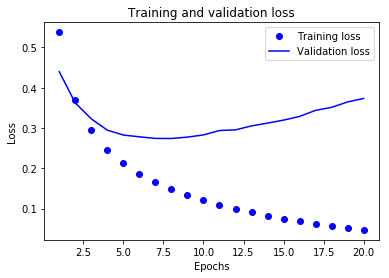

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

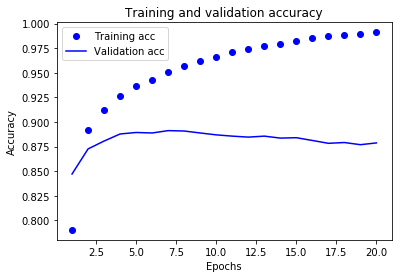

In [31]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
25000/25000 [==============================] - 8s 301us/step - loss: 0.0589 - acc: 0.9842
Epoch 2/5
25000/25000 [==============================] - 8s 308us/step - loss: 0.0548 - acc: 0.9863
Epoch 3/5
25000/25000 [==============================] - 8s 310us/step - loss: 0.0515 - acc: 0.9870
Epoch 4/5
25000/25000 [==============================] - 8s 317us/step - loss: 0.0480 - acc: 0.9884 4s
Epoch 5/5
25000/25000 [==============================] - 8s 318us/step


[0.571857354798317, 0.8524]

Тоже не помогло
Пока лучший вариант: два слоя по 16

** Использование MSE вместо binary_crossentropy **  
***используем самую удачную из моделей: 2 слоя по 16***

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 10s 648us/step - loss: 0.1744 - acc: 0.7794 - val_loss: 0.1208 - val_acc: 0.8720
Epoch 2/4
15000/15000 [==============================] - 6s 421us/step - loss: 0.0935 - acc: 0.9025 - val_loss: 0.0959 - val_acc: 0.8875
Epoch 3/4
15000/15000 [==============================] - 7s 437us/step - loss: 0.0676 - acc: 0.9271 - val_loss: 0.0864 - val_acc: 0.8912
Epoch 4/4
25000/25000 [==============================] - 12s 469us/step


[0.09379273867607117, 0.87416]

Точность с изменением функции потерь незначительно повысилась  
Оба варианта хорошо подходят для задачи
MSE - универсальная функция

** ИЗменение функции активации на tanh  **

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 9s 614us/step - loss: 0.1707 - acc: 0.7541 - val_loss: 0.1126 - val_acc: 0.8642
Epoch 2/4
15000/15000 [==============================] - 6s 397us/step - loss: 0.0831 - acc: 0.9004 - val_loss: 0.0959 - val_acc: 0.8688
Epoch 3/4
15000/15000 [==============================] - 6s 393us/step - loss: 0.0578 - acc: 0.9339 - val_loss: 0.0848 - val_acc: 0.8878
Epoch 4/4
25000/25000 [==============================] - 19s 765us/step


[0.0902236118888855, 0.8794]

Небольшое улучшение - теперь почти 0.88

## Classifying newswires: a multiclass classification example

### The Reuters dataset

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s take a look.



In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print("Training examples: {}".format(len(train_data)))
print("Test examples: {}".format(len(test_data)))

Training examples: 8982
Test examples: 2246


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[10]])
decoded_newswire


'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

### Preparing the data

You can vectorize the data with the exact same code as in the previous example.

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 912us/step - loss: 2.5305 - acc: 0.4955 - val_loss: 1.7222 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 3s 418us/step - loss: 1.4475 - acc: 0.6872 - val_loss: 1.3482 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 3s 416us/step - loss: 1.0979 - acc: 0.7641 - val_loss: 1.1721 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 4s 468us/step - loss: 0.8715 - acc: 0.8156 - val_loss: 1.0779 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 5s 663us/step - loss: 0.7048 - acc: 0.8478 - val_loss: 0.9843 - val_acc: 0.7770
Epoch 6/20
7982/7982 [==============================] - 3s 413us/step - loss: 0.5670 - acc: 0.8799 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 3s 364us/step - loss: 0.4585 - acc: 0.9048 - val_loss: 0.9080 - val_acc: 0.8010


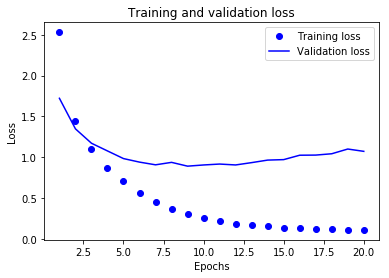

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

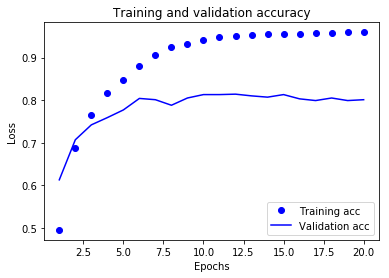

In [14]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 7s 845us/step - loss: 2.5391 - acc: 0.5229 - val_loss: 1.6722 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 4s 467us/step - loss: 1.3702 - acc: 0.7122 - val_loss: 1.2740 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 4s 489us/step - loss: 1.0127 - acc: 0.7790 - val_loss: 1.1318 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 4s 522us/step - loss: 0.7975 - acc: 0.8250 - val_loss: 1.0534 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 4s 527us/step - loss: 0.6391 - acc: 0.8634 - val_loss: 0.9740 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 5s 566us/step - loss: 0.5118 - acc: 0.8920 - val_loss: 0.9103 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 3s 354us/step - loss: 0.4119 - acc: 0.9144 - val_loss: 0.8914 - val_acc: 0.8210
Epoch 8

[1.0254030081170644, 0.7756010686194165]

This approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good.

### Further experiments (Hometask)

* Try using larger or smaller layers: 32 units, 128 units, and so on.
* You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [23]:
#32 units
model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(32, activation='relu'))
model32.add(layers.Dense(46, activation='softmax'))

model32.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history32 = model32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 896us/step - loss: 3.0740 - acc: 0.4766 - val_loss: 2.3793 - val_acc: 0.5950
Epoch 2/20
7982/7982 [==============================] - 4s 496us/step - loss: 2.0120 - acc: 0.6111 - val_loss: 1.7396 - val_acc: 0.6210
Epoch 3/20
7982/7982 [==============================] - 4s 491us/step - loss: 1.4983 - acc: 0.6756 - val_loss: 1.4267 - val_acc: 0.6790
Epoch 4/20
7982/7982 [==============================] - 5s 616us/step - loss: 1.2135 - acc: 0.7413 - val_loss: 1.2647 - val_acc: 0.7080
Epoch 5/20
7982/7982 [==============================] - 4s 486us/step - loss: 1.0281 - acc: 0.7850 - val_loss: 1.1583 - val_acc: 0.7390
Epoch 6/20
7982/7982 [==============================] - 4s 499us/step - loss: 0.8829 - acc: 0.8191 - val_loss: 1.0864 - val_acc: 0.7600
Epoch 7/20
7982/7982 [==============================] - 3s 419us/step - loss: 0.7645 - acc: 0.8440 - val_loss: 1.0400 - val_acc: 0.7770


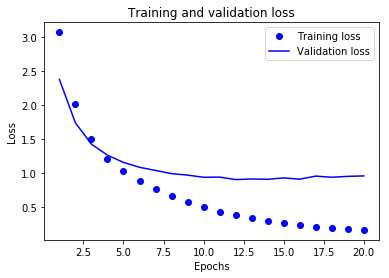

In [24]:
loss32 = history32.history['loss']
val_loss32 = history32.history['val_loss']

epochs32 = range(1, len(loss32) + 1)

plt.plot(epochs32, loss32, 'bo', label='Training loss')
plt.plot(epochs32, val_loss32, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

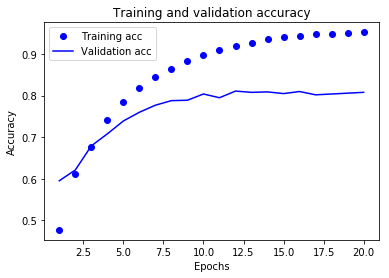

In [25]:
plt.clf()

acc32 = history32.history['acc']
val_acc32 = history32.history['val_acc']

plt.plot(epochs32, acc32, 'bo', label='Training acc')
plt.plot(epochs32, val_acc32, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
model32.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model32.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 553us/step - loss: 0.1505 - acc: 0.9546 - val_loss: 1.0103 - val_acc: 0.7940
Epoch 2/9
7982/7982 [==============================] - 5s 587us/step - loss: 0.1435 - acc: 0.9559 - val_loss: 0.9976 - val_acc: 0.8030
Epoch 3/9
7982/7982 [==============================] - 4s 444us/step - loss: 0.1352 - acc: 0.9565 - val_loss: 1.0282 - val_acc: 0.8030
Epoch 4/9
7982/7982 [==============================] - 4s 504us/step - loss: 0.1311 - acc: 0.9560 - val_loss: 1.0283 - val_acc: 0.8040
Epoch 5/9
7982/7982 [==============================] - 4s 486us/step - loss: 0.1193 - acc: 0.9573 - val_loss: 1.0341 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 4s 497us/step - loss: 0.1185 - acc: 0.9587 - val_loss: 1.0193 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 3s 346us/step - loss: 0.1138 - acc: 0.9578 - val_loss: 1.0907 - val_acc: 0.7910
Epoch 8

[1.2912797772873754, 0.7698130009170101]

Точность при 32 нейронах в слое немного ниже - 77 (при 64 нейронах точность была 78), поэтому попробуем увеличить их количество

In [27]:
#128 units
model128 = models.Sequential()
model128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model128.add(layers.Dense(128, activation='relu'))
model128.add(layers.Dense(46, activation='softmax'))

model128.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history128 = model128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.1634 - acc: 0.5392 - val_loss: 1.3592 - val_acc: 0.7050
Epoch 2/20
7982/7982 [==============================] - 8s 948us/step - loss: 1.1039 - acc: 0.7630 - val_loss: 1.0952 - val_acc: 0.7580
Epoch 3/20
7982/7982 [==============================] - 5s 604us/step - loss: 0.7795 - acc: 0.8355 - val_loss: 1.0446 - val_acc: 0.7780
Epoch 4/20
7982/7982 [==============================] - 5s 564us/step - loss: 0.5759 - acc: 0.8779 - val_loss: 0.8969 - val_acc: 0.8230
Epoch 5/20
7982/7982 [==============================] - 6s 807us/step - loss: 0.4134 - acc: 0.9139 - val_loss: 0.9083 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 7s 921us/step - loss: 0.3261 - acc: 0.9295 - val_loss: 0.8605 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 8s 1ms/step - loss: 0.2471 - acc: 0.9441 - val_loss: 0.9081 - val_acc: 0.8120
Epoc

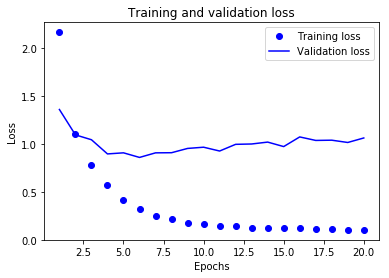

In [28]:
loss128 = history128.history['loss']
val_loss128 = history128.history['val_loss']

epochs128 = range(1, len(loss128) + 1)

plt.plot(epochs128, loss128, 'bo', label='Training loss')
plt.plot(epochs128, val_loss128, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

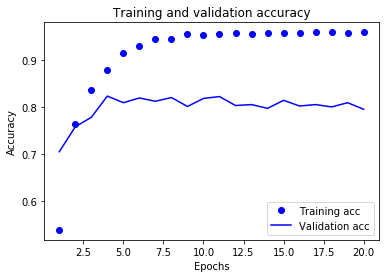

In [29]:
plt.clf()

acc128 = history128.history['acc']
val_acc128 = history128.history['val_acc']

plt.plot(epochs128, acc128, 'bo', label='Training acc')
plt.plot(epochs128, val_acc128, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
history128 = model128.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model128.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 4s 528us/step - loss: 0.1030 - acc: 0.9564 - val_loss: 1.0601 - val_acc: 0.8120
Epoch 2/4
7982/7982 [==============================] - 5s 639us/step - loss: 0.1048 - acc: 0.9574 - val_loss: 1.1190 - val_acc: 0.7990
Epoch 3/4
7982/7982 [==============================] - 4s 532us/step - loss: 0.1016 - acc: 0.9574 - val_loss: 1.2067 - val_acc: 0.7800
Epoch 4/4
2246/2246 [==============================] - 4s 2ms/step


[1.243984403932933, 0.789848619715401]

Точность возрасла до 79%

In [31]:
#256 units
model256 = models.Sequential()
model256.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model256.add(layers.Dense(256, activation='relu'))
model256.add(layers.Dense(46, activation='softmax'))

model256.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history256 = model256.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 1.9924 - acc: 0.5757 - val_loss: 1.2405 - val_acc: 0.7180
Epoch 2/20
7982/7982 [==============================] - 6s 795us/step - loss: 0.9620 - acc: 0.7869 - val_loss: 0.9747 - val_acc: 0.8050
Epoch 3/20
7982/7982 [==============================] - 6s 732us/step - loss: 0.6203 - acc: 0.8602 - val_loss: 0.8977 - val_acc: 0.8230
Epoch 4/20
7982/7982 [==============================] - 6s 752us/step - loss: 0.4082 - acc: 0.9097 - val_loss: 0.9906 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 6s 710us/step - loss: 0.2805 - acc: 0.9384 - val_loss: 0.8999 - val_acc: 0.8120
Epoch 6/20
7982/7982 [==============================] - 6s 736us/step - loss: 0.2261 - acc: 0.9432 - val_loss: 0.9170 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 6s 713us/step - loss: 0.1899 - acc: 0.9505 - val_loss: 0.9119 - val_acc: 0.8110
Ep

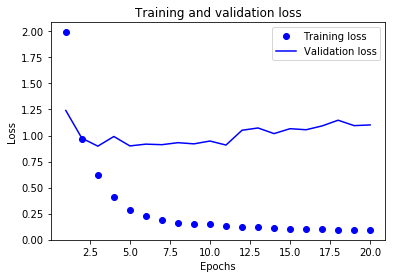

In [32]:
loss256 = history256.history['loss']
val_loss256 = history256.history['val_loss']

epochs256 = range(1, len(loss128) + 1)

plt.plot(epochs256, loss256, 'bo', label='Training loss')
plt.plot(epochs256, val_loss256, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

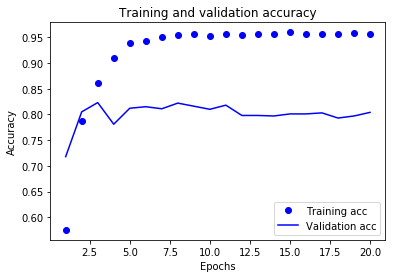

In [33]:
plt.clf()

acc256 = history256.history['acc']
val_acc256 = history256.history['val_acc']

plt.plot(epochs256, acc256, 'bo', label='Training acc')
plt.plot(epochs256, val_acc256, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
history256 = model256.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model256.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 7s 919us/step - loss: 0.0826 - acc: 0.9574 - val_loss: 1.2435 - val_acc: 0.7890
Epoch 2/4
7982/7982 [==============================] - 7s 922us/step - loss: 0.0809 - acc: 0.9570 - val_loss: 1.2110 - val_acc: 0.7910
Epoch 3/4
7982/7982 [==============================] - 6s 808us/step - loss: 0.0774 - acc: 0.9587 - val_loss: 1.3916 - val_acc: 0.7870
Epoch 4/4
2246/2246 [==============================] - 4s 2ms/step


[1.411914731600618, 0.7880676758682101]

Точность незначительно уменьшилась, все еще около 79%  
Попробуем сочетание

In [41]:
#256+128 units
model_2 = models.Sequential()
model_2.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 10s 1ms/step - loss: 1.9641 - acc: 0.5685 - val_loss: 1.2689 - val_acc: 0.7180
Epoch 2/20
7982/7982 [==============================] - 6s 745us/step - loss: 0.9361 - acc: 0.7993 - val_loss: 0.9985 - val_acc: 0.7870
Epoch 3/20
7982/7982 [==============================] - 6s 711us/step - loss: 0.6003 - acc: 0.8695 - val_loss: 0.9028 - val_acc: 0.8120
Epoch 4/20
7982/7982 [==============================] - 6s 775us/step - loss: 0.4026 - acc: 0.9151 - val_loss: 0.8665 - val_acc: 0.8130
Epoch 5/20
7982/7982 [==============================] - 7s 911us/step - loss: 0.3053 - acc: 0.9311 - val_loss: 0.8475 - val_acc: 0.8300
Epoch 6/20
7982/7982 [==============================] - 8s 949us/step - loss: 0.2282 - acc: 0.9465 - val_loss: 0.9069 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 7s 939us/step - loss: 0.1952 - acc: 0.9483 - val_loss: 0.8720 - val_acc: 0.8130
E

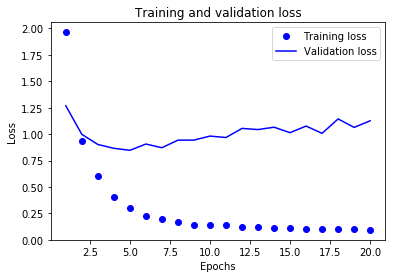

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss128) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

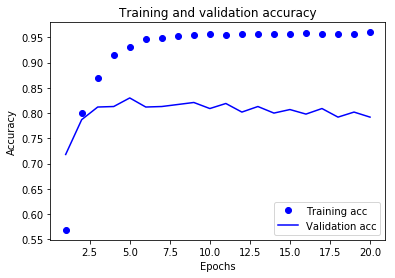

In [43]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
history = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model_2.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 7s 854us/step - loss: 0.0938 - acc: 0.9567 - val_loss: 1.1597 - val_acc: 0.7900
Epoch 2/5
7982/7982 [==============================] - 8s 982us/step - loss: 0.0927 - acc: 0.9565 - val_loss: 1.1639 - val_acc: 0.7910
Epoch 3/5
7982/7982 [==============================] - 7s 930us/step - loss: 0.0927 - acc: 0.9573 - val_loss: 1.1355 - val_acc: 0.7990
Epoch 4/5
7982/7982 [==============================] - 7s 904us/step - loss: 0.0877 - acc: 0.9584 - val_loss: 1.1604 - val_acc: 0.7970
Epoch 5/5
2246/2246 [==============================] - 2s 970us/step


[1.3368777634305606, 0.7907390917716871]

Значение точности возросло до полных 79%

In [34]:
#128+64 units
model_3 = models.Sequential()
model_3.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(46, activation='softmax'))

model_3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.2943 - acc: 0.5542 - val_loss: 1.4951 - val_acc: 0.6800
Epoch 2/20
7982/7982 [==============================] - 5s 590us/step - loss: 1.1723 - acc: 0.7491 - val_loss: 1.1490 - val_acc: 0.7300
Epoch 3/20
7982/7982 [==============================] - 4s 540us/step - loss: 0.8412 - acc: 0.8191 - val_loss: 1.0147 - val_acc: 0.7890
Epoch 4/20
7982/7982 [==============================] - 5s 604us/step - loss: 0.6246 - acc: 0.8708 - val_loss: 0.9640 - val_acc: 0.7930
Epoch 5/20
7982/7982 [==============================] - 5s 612us/step - loss: 0.4734 - acc: 0.9035 - val_loss: 0.9907 - val_acc: 0.7780
Epoch 6/20
7982/7982 [==============================] - 5s 626us/step - loss: 0.3564 - acc: 0.9277 - val_loss: 0.8905 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 5s 635us/step - loss: 0.2818 - acc: 0.9369 - val_loss: 1.0109 - val_acc: 0.7800
Ep

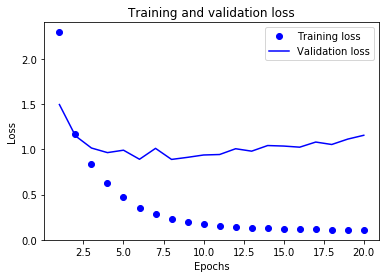

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss128) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

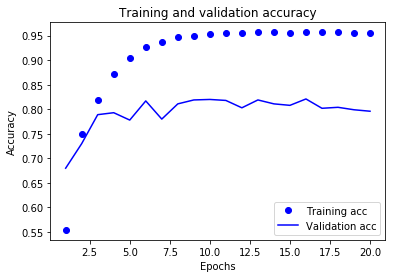

In [36]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
history = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model_3.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 4s 563us/step - loss: 0.1047 - acc: 0.9570 - val_loss: 1.0966 - val_acc: 0.8030
Epoch 2/4
7982/7982 [==============================] - 4s 524us/step - loss: 0.1001 - acc: 0.9593 - val_loss: 1.1101 - val_acc: 0.8050
Epoch 3/4
7982/7982 [==============================] - 5s 569us/step - loss: 0.1044 - acc: 0.9565 - val_loss: 1.1270 - val_acc: 0.8060
Epoch 4/4
2246/2246 [==============================] - 5s 2ms/step


[1.3324294725063117, 0.7747105966162066]

*** Таким образом, для модели из двух слоев самым удачным оказалось сочетание слоев из 256 и 128 нейронов ***  
validation accuracy ~ 0.79

** Один слой **

In [38]:
#128 units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 887us/step - loss: 2.2101 - acc: 0.5717 - val_loss: 1.4356 - val_acc: 0.7140
Epoch 2/20
7982/7982 [==============================] - 4s 467us/step - loss: 1.1165 - acc: 0.7767 - val_loss: 1.0934 - val_acc: 0.7850
Epoch 3/20
7982/7982 [==============================] - 5s 582us/step - loss: 0.7773 - acc: 0.8413 - val_loss: 0.9591 - val_acc: 0.7990
Epoch 4/20
7982/7982 [==============================] - 5s 583us/step - loss: 0.5742 - acc: 0.8884 - val_loss: 0.8854 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 5s 594us/step - loss: 0.4360 - acc: 0.9136 - val_loss: 0.8320 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 5s 606us/step - loss: 0.3416 - acc: 0.9286 - val_loss: 0.8257 - val_acc: 0.8240
Epoch 7/20
7982/7982 [==============================] - 4s 493us/step - loss: 0.2756 - acc: 0.9404 - val_loss: 0.8216 - val_acc: 0.8210


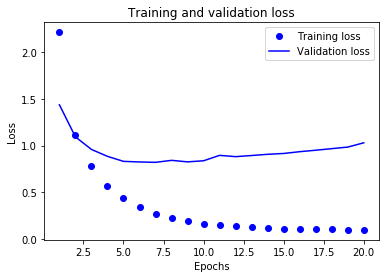

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss128) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

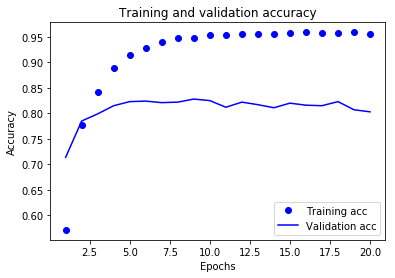

In [40]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 5s 629us/step - loss: 0.0986 - acc: 0.9563 - val_loss: 1.0217 - val_acc: 0.8070
Epoch 2/5
7982/7982 [==============================] - 4s 502us/step - loss: 0.0979 - acc: 0.9555 - val_loss: 1.0336 - val_acc: 0.8070
Epoch 3/5
7982/7982 [==============================] - 4s 462us/step - loss: 0.0970 - acc: 0.9578 - val_loss: 1.0365 - val_acc: 0.8060
Epoch 4/5
7982/7982 [==============================] - 5s 587us/step - loss: 0.0967 - acc: 0.9557 - val_loss: 1.0596 - val_acc: 0.8050
Epoch 5/5
2246/2246 [==============================] - 2s 709us/step


[1.2373399420285587, 0.7880676758682101]

***Таким образом, на нейросети из двух слоев можно добиться немного более высокой точности, чем на нейросети из одного слоя***

** Три слоя **

In [42]:
#256+128+64 units
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 12s 2ms/step - loss: 2.0089 - acc: 0.5739 - val_loss: 1.2328 - val_acc: 0.7160
Epoch 2/20
7982/7982 [==============================] - 8s 959us/step - loss: 0.9701 - acc: 0.7824 - val_loss: 0.9775 - val_acc: 0.7920
Epoch 3/20
7982/7982 [==============================] - 8s 994us/step - loss: 0.6193 - acc: 0.8675 - val_loss: 0.9162 - val_acc: 0.8150
Epoch 4/20
7982/7982 [==============================] - 8s 1ms/step - loss: 0.4315 - acc: 0.9072 - val_loss: 0.8463 - val_acc: 0.8240
Epoch 5/20
7982/7982 [==============================] - 8s 995us/step - loss: 0.2924 - acc: 0.9360 - val_loss: 0.8763 - val_acc: 0.8140
Epoch 6/20
7982/7982 [==============================] - 9s 1ms/step - loss: 0.2575 - acc: 0.9361 - val_loss: 0.8867 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 8s 995us/step - loss: 0.1871 - acc: 0.9495 - val_loss: 0.8734 - val_acc: 0.8230
Epoch

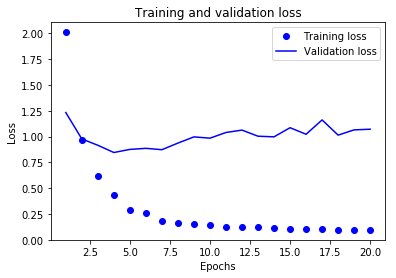

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss128) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

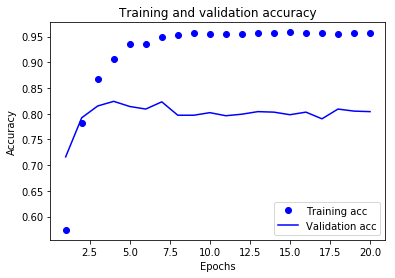

In [44]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 7s 824us/step - loss: 0.0957 - acc: 0.9583 - val_loss: 1.1673 - val_acc: 0.7910
Epoch 2/4
7982/7982 [==============================] - 7s 881us/step - loss: 0.0900 - acc: 0.9568 - val_loss: 1.1331 - val_acc: 0.8000
Epoch 3/4
7982/7982 [==============================] - 7s 896us/step - loss: 0.0902 - acc: 0.9568 - val_loss: 1.1372 - val_acc: 0.7940
Epoch 4/4
2246/2246 [==============================] - 5s 2ms/step


[1.4132643125997733, 0.778717720444884]

**Итак, два слоя для данной задачи - лучшее решение  
Точность при трёх слоях немного снижается**

### Wrapping up

* If you’re trying to classify data points among N classes, your network should end with a ```Dense``` layer of size N.


* In a single-label, multiclass classification problem, your network should end with a ```softmax``` activation so that it will output a probability distribution over the N output classes.


* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.


* There are two ways to handle labels in multiclass classification:
     * Encoding the labels via categorical encoding (also known as one-hot encoding) and using ```categorical_crossentropy``` as a loss function
     
     * Encoding the labels as integers and using the ```sparse_categorical_crossentropy``` loss function


* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

## Predicting house prices: a regression example

The two previous examples were considered classification problems, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is regression, which consists of predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.



### The Boston Housing Price dataset


You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.



In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Let’s look at the data:

In [ ]:
print('Shape of train data: {}'.format(train_data.shape))
print('Shape of test data: {}'.format(test_data.shape))

The targets are the median values of owner-occupied homes, in thousands of dollars:



In [ ]:
train_targets[:10]

The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

###  Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.



In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.



### Building your network

Because so few samples are available, you’ll use a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


The network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a ```sigmoid``` activation function to the last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range.



Note that you compile the network with the ```mse``` loss function—**mean squared error**, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

You’re also monitoring a new metric during training: **mean absolute error (MAE)**. It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by \$500 on average.



### Validating your approach using K-fold validation

To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.



The best practice in such situations is to use **K-fold cross-validation**. It consists of splitting the available data into **K** partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. In terms of code, this is straightforward.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig11_alt.jpg)

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Running this with num_epochs = 100 yields the following results:



In [ ]:
print(all_scores)
print(np.mean(all_scores))

The different runs do indeed show rather different validation scores, from 2.08 to 2.96. The average (3.0) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by \$3,000 on average, which is significant considering that the prices range from \$10,000 to \$50,000.



Let’s try training the network a bit longer: 500 epochs. To keep a record of how well the model does at each epoch, you’ll modify the training loop to save the per-epoch validation score log.

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

You can then compute the average of the per-epoch MAE scores for all folds.



In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. 

Let’s do the following:

Omit the first 10 data points, which are on a different scale than the rest of the curve.
Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.



Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.



In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


Here’s the final result:

In [ ]:
test_mae_score

You’re still off by about \$2,550.



### Wrapping up

* Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.


* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).


* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.


* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.


* When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.